Egg is cooked at time:  1002.7 seconds


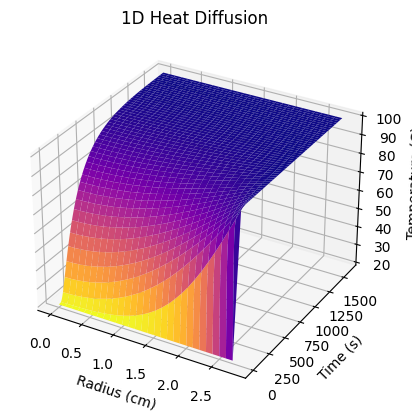

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Chicken Egg Parameters (https://www.sciencedirect.com/science/article/abs/pii/S0260877405001330)
R = 2.75  # sphere radius (cm)
T = 1600  # simulation time (s)
K = 44  # thermal conductivity (J/s/cm/K)
Cp = 3.32  # specific heat capacity (J/g/K)
P = 1.032e3  # density (g/cm^3)

# Initial Conditions
bc_1 = 100  # dirichlet boundary condition 1
bc_2 = 20   # dirichlet boundary condition 2

def stability_check(j, k):
    """
    Check stability of explicit scheme
    """
    c = np.sqrt(K / (Cp * P))  # thermal diffusivity
    factor = c ** 2 * j / (k ** 2)
    if factor > 0.5:
        print("Factor is greater than 0.5, unstable solution")
        return None
    return factor

# Grid Spacing
dt = 0.1  # time step
dp = 0.1  # space step
factor = stability_check(dt, dp)  # stability factor

# Spatial and Temporal Grids
t = np.arange(0, T + dt, dt)
p = np.arange(0, R + dp, dp)

# Initialize temperature matrix
n = len(t)
m = len(p)
T = np.zeros((n, m + 1))  # includes ghost node

# Loading initial conditions
T[0, :] = bc_2
T[:, 0] = bc_1

# Explicit solver
for i in range(1, n):
    for j in range(1, m):
        T[i, j] = (1 - 2 * factor) * T[i - 1, j] + factor * (T[i - 1, j - 1] + T[i - 1, j + 1])  # explicit scheme
    T[i, -1] = T[i, -3]  # neumann boundary condition

T = T[:, :-1]  # remove ghost node

# Find time when egg is cooked
cook_start = 0

for x in range(1, n):
    if T[x, -1] >= 80:
        cook_start += 1
    if cook_start*dt >= 600:
        print("Egg is cooked at time: ", x*dt, "seconds")
        break

# Plotting
# Create meshgrid
pp, tt = np.meshgrid(p, t)

# Flip matrix for plotting
T = np.flip(T, axis=1)  

# Create 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(pp, tt, T, cmap='plasma_r')

# Add labels and title
ax.set_xlabel('Radius (cm)')
ax.set_ylabel('Time (s)')
ax.set_zlabel('Temperature (C)')
ax.set_title('1D Heat Diffusion')

# Show the plot
plt.show()